### In this hands-on you will be performing CNN operations using TensorFlow package

- Run the below cell to import necessary packages

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf

- Read the image file 'bird.png'(in current directory) using **mpimg.imread("file_path")** function provided by matplotlib.image module. This function reads the image and returns the pixel intensities in numpy format. Assign this result to variable **img**.
- The dimension of **img** will now be $n_H$ x $n_w$ x $n_c$
- reshape **img** to dimension $m$ x $n_H$ x $n_w$ x $n_c$ and assign it to variable **data**. The dimension **m** will be **one** since we are dealing with one image data. (use numpy's reshape())

In [20]:
###Start code here
img = mpimg.imread("./bird.png")
# print(img.shape)
data = img.reshape([1,img.shape[0],img.shape[1],img.shape[2]])
###End code

print(type(img))
print("Image dimension ",img.shape)
print(img.shape)
print("input data dimension ", data.shape)

<class 'numpy.ndarray'>
Image dimension  (194, 259, 3)
(194, 259, 3)
input data dimension  (1, 194, 259, 3)


- Run the below cell to plot the image

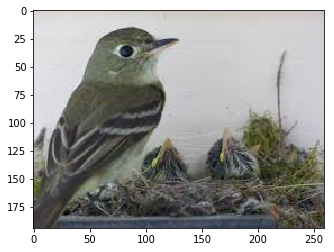

In [21]:
plt.imshow(data[0,:,:,:])

### Single layer convolution
- Initialise filter variable W each with random values using tf.random_normal()
  - filter configurations:
    - num_filters = 32
    - num_rows, num_columns, num_channels = 5,5,3 
- initilze bias variable using tf.random_normal() of shape 32

- using tf.nn.conv2d() perform strided convolution on **input_** using filter **W** of stride one and same padding, assign the result to variable **conv**
- use tf.nn.bias_add() to add biase **b** to vector **conv** and assign the result to variable **conv_bias**
- apply relu activation on vector **conv_bias** and assign it to variable **conv_out**
- perform max pooling using tf.nn.pool() using filter of size 3 x 3 and valid padding

In [23]:
graph = tf.Graph()   
with graph.as_default():
    tf.random.set_seed(1)
    input_= tf.constant(data.astype(np.float32))  ##The input data is coverted into tensor of type float32
    ###Start code here
    W = tf.Variable(tf.random.normal([5,5,3,32]))
    b = tf.Variable(tf.random.normal([32]))
    
     
    conv = tf.nn.conv2d(input=input_ , filters=W, strides=[1, 1, 1, 1], padding="SAME")
    conv_bias = tf.nn.bias_add(conv,b)
    conv_out = tf.nn.relu(conv_bias)
    conv_pool = tf.nn.pool(input=conv_out,window_shape=[3,3],padding="VALID",pooling_type="MAX")
    ###ENd code

- Run the below cell to run the tensorflow graph defined in the above steps

Expected output  
Tensor("Relu:0", shape=(1, 194, 259, 32), dtype=float32)

Tensor("max_pool:0", shape=(1, 192, 257, 32), dtype=float32)  

[[ 2.35204768  2.43864083  2.06985545  2.01861191  2.53203893]  
 [ 2.50827527  2.18754387  1.9434787   1.68445456  2.16825724]  
 [ 2.24186778  2.29028106  2.66557431  2.32409024  2.51346755]  
 [ 2.09425473  2.65057802  3.0601604   2.65026021  2.57551527]  
 [ 2.33120751  2.55626559  2.69701314  2.72019339  2.46118355]]  
 
 [[ 2.66557431  2.66557431  2.66557431  3.11053085  3.11053085]  
 [ 3.0601604   3.0601604   3.0601604   3.11053085  3.11053085]  
 [ 3.0601604   3.0601604   3.0601604   3.11053085  3.11053085]  
 [ 3.0601604   3.0601604   3.0601604   2.99760103  2.99760103]  
 [ 2.69701314  2.89145637  3.06911826  3.06911826  3.06911826]]    

In [24]:
with tf.compat.v1.Session(graph=graph) as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    filters = sess.run(W)
    
    conv_output = sess.run(conv_out)
    
    after_pooling = sess.run(conv_pool)

###sanity check
print(conv_out)
print(conv_pool)
print(conv_output[0,100:105,200:205, 7])
print("\n", after_pooling[0,100:105,200:205, 7])


with open("output.txt", "w+") as file:
    file.write("mean1 = %f" %np.mean(conv_output))
    file.write("\nmean2 = %f" %np.mean(after_pooling))

Tensor("Relu:0", shape=(1, 194, 259, 32), dtype=float32)
Tensor("max_pool:0", shape=(1, 192, 257, 32), dtype=float32)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


- Run the below cell to visualize the actual filters and plot the convolution output.       

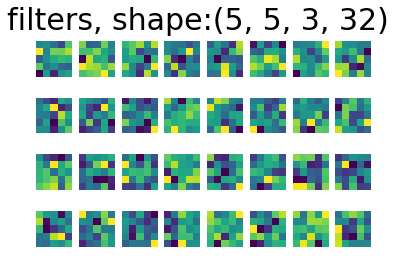

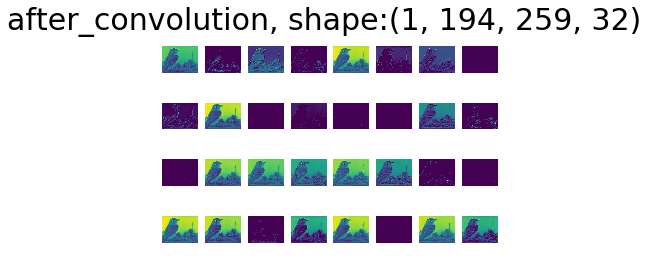

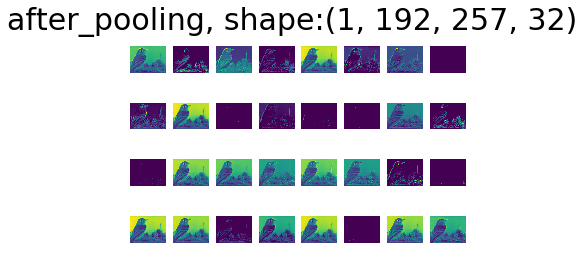

In [25]:
def show_conv_results(data, title):
    fig1 = plt.figure()
    fig1.suptitle(title, fontsize=30)
    rows, cols = 4, 8
    for i in range(np.shape(data)[3]):
        img = data[0, :, :, i]
        ax1 = fig1.add_subplot(rows, cols, i + 1)
        ax1.imshow(img, interpolation='none')
        ax1.axis('off')
        

def show_weights(W,title):
    fig2 = plt.figure()
    fig2.suptitle(title, fontsize=30)
    rows, cols = 4, 8
    for i in range(np.shape(W)[3]):
        img = W[:, :, 0, i]
        ax2 = fig2.add_subplot(rows, cols, i + 1)
        ax2.imshow(img, interpolation='none')
        ax2.axis('off')

show_weights(filters, title = "filters, "+"shape:" +str(filters.shape))
show_conv_results(conv_output, title = "after_convolution, "+ "shape:" + str(conv_output.shape))
show_conv_results(after_pooling, title = "after_pooling, "+"shape:"+str(after_pooling.shape))
        